<a href="https://colab.research.google.com/github/Mayank-004/Boston-Crime/blob/main/BostonCRIME_Pyspark_Randomforest_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark



     |████████████████████████████████| 212.3MB 60kB/s 
     |████████████████████████████████| 204kB 44.2MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=c5a02dc5a48f12d9eda69e36f4462ae76911a821cac3580ccbd54aaf17e03b45
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [3]:
import pyspark
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly



In [4]:

from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)

In [55]:
df1 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2015.csv",header=True)
df2 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2016.csv",header=True)
df3 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2017.csv",header=True)
df4 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2018.csv",header=True)
df5 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2019.csv",header=True)
df6 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2020.csv",header=True)
df7 = sqlContext.read.csv("/content/drive/MyDrive/Boston Crime Data/crime-incident-reports-2021.csv",header=True)
union_data = df1.unionAll(df2).unionAll(df3).unionAll(df4).unionAll(df5).unionAll(df6).unionAll(df7)


In [ ]:
union_data.show()

In [ ]:
union_data.describe().toPandas().transpose()


### Data Visualization

In [56]:
union_df = union_data.toPandas()


In [ ]:
'''
#union_df.loc[:,'OFFENSE_CODE'] = union_df.loc[:,'OFFENSE_CODE'].astype(float) # converting Total VC capital to float from string
#union_df.loc[:,'YEAR'] = union_df.loc[:,'YEAR'].astype(float) # converting Total VC capital to float from string
union_df.loc[:,'MONTH'] = union_df.loc[:,'MONTH'].astype(int) # converting Total VC capital to float from string
union_df.loc[:,'HOUR'] = union_df.loc[:,'HOUR'].astype(float) # converting Total VC capital to float from string
union_df.loc[:,'Lat'] = union_df.loc[:,'Lat'].astype(float) # converting Total VC capital to float from string
union_df.loc[:,'Long'] = union_df.loc[:,'Long'].astype(float) # converting Total VC capital to float from string
'''


In [32]:
union_df.groupby('YEAR')['MONTH'].max()


YEAR
2015    9
2016    9
2017    9
2018    9
2019    9
2020    9
2021    5
Name: MONTH, dtype: object

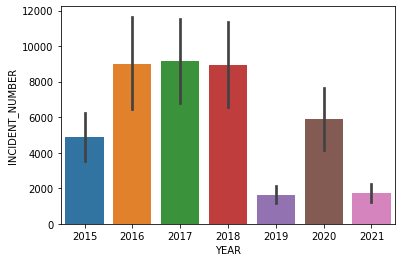

In [62]:

yc = union_df.groupby(['YEAR','DISTRICT']).count()['INCIDENT_NUMBER'].reset_index()

yc

sns.barplot(x = "YEAR", y = "INCIDENT_NUMBER",data = yc)



In [16]:
union_df.groupby('YEAR').nunique()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
YEAR,,,,,,,,,,,,,,,,
2015,46966,230,62,215,12,876,1,37846,7,7,24,4,3141,11184,11180,11190
2016,87994,230,65,213,12,878,1,72978,12,7,24,4,3605,13412,13414,13421
2017,89486,197,66,191,12,878,1,74091,12,7,24,4,3628,13313,13317,13323
2018,86734,188,61,185,12,877,1,71235,12,7,24,4,3579,13055,13056,13064
2019,19782,130,0,130,13,854,2,15476,4,7,24,0,4224,5224,5224,5224
2020,70894,121,0,121,13,876,2,56908,12,7,24,0,7974,9270,9270,9270
2021,21145,111,0,111,13,850,2,17960,5,7,24,0,4155,5598,5598,5598


In [34]:
union_df.groupby('MONTH').nunique()


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
MONTH,,,,,,,,,,,,,,,,
1,32276,295,63,213,13,871,3,26650,5,7,24,4,3921,11267,11268,11272
10,43976,299,63,217,13,871,3,35586,6,7,24,4,4489,13233,13235,13241
11,39848,299,61,218,13,872,3,32607,6,7,24,4,4233,12565,12566,12572
12,39159,308,64,225,13,873,3,32259,6,7,24,4,4063,12539,12540,12544
2,29736,294,62,213,13,868,3,24512,5,7,24,4,3649,10709,10710,10714
3,32540,288,60,206,13,873,3,26872,5,7,24,4,3777,11250,11249,11254
4,31165,284,60,206,13,868,3,25931,5,7,24,4,3599,10982,10984,10987
5,29161,279,62,207,13,871,3,23907,5,7,24,4,3358,10325,10323,10327
6,33059,291,62,214,13,876,3,26787,5,7,24,4,3576,11102,11100,11106


[Text(0, 0, 'Brighton'),
 Text(0, 0, 'Charlestown'),
 Text(0, 0, 'Dorchester'),
 Text(0, 0, 'Downtown'),
 Text(0, 0, 'East Boston'),
 Text(0, 0, 'External'),
 Text(0, 0, 'Hyde Park'),
 Text(0, 0, 'Mattapan'),
 Text(0, 0, 'Roxbury'),
 Text(0, 0, 'South Boston'),
 Text(0, 0, 'South End'),
 Text(0, 0, 'West Roxbury')]

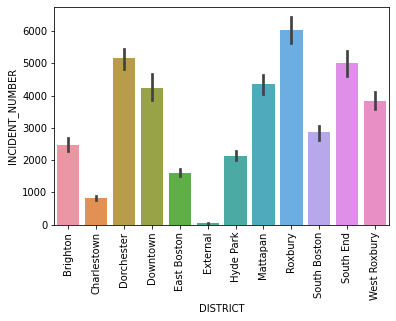

In [67]:
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("A15","Charlestown")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("A1","Downtown")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("A7","East Boston")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("B2","Roxbury")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("B3","Mattapan")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("C6","South Boston")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("C11","Dorchester")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("D4","South End")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("D14","Brighton")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("E5","West Roxbury")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("E18","Hyde Park")
union_df['DISTRICT']= union_df['DISTRICT'].str.replace("E13","Jamaica Plain")


ym = union_df.groupby(['MONTH','DISTRICT']).count()['INCIDENT_NUMBER'].reset_index()
#ym


g=sns.barplot(x = "DISTRICT", y = "INCIDENT_NUMBER",data = ym)
g.set_xticklabels(g.get_xticklabels(),rotation=90)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
categorical_col=union_df.select_dtypes(include=['object']).columns.tolist()
for x in categorical_col:
    union_df[x] = le.fit_transform(union_df[x].astype(str))

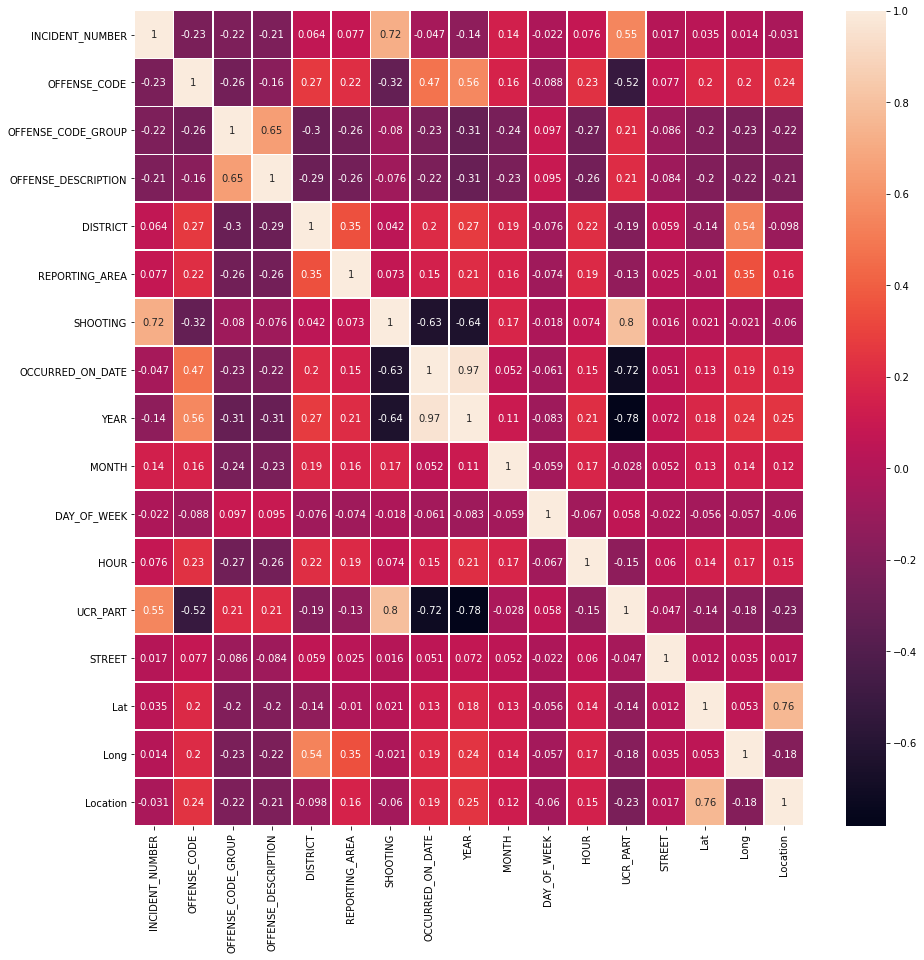

In [21]:
corrMatrix= union_df.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

### Building Model

In [60]:
# drop column with High Correlation and intuitively 

columns_to_drop = ['INCIDENT_NUMBER', 'OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','SHOOTING','OCCURRED_ON_DATE','Location']

union_data_clean = union_data.drop(*columns_to_drop)

union_data_clean.show()


# Removing Null Values from Data
union_data_clean=union_data_clean.na.drop()
union_data_clean=union_data_clean.fillna(0)


# Converting Data types of column for processing
union_data_clean = union_data_clean.withColumn("REPORTING_AREA", union_data_clean['REPORTING_AREA'].cast('float'))
union_data_clean = union_data_clean.withColumn("MONTH", union_data_clean['MONTH'].cast('float'))
union_data_clean = union_data_clean.withColumn("HOUR", union_data_clean['HOUR'].cast('float'))
union_data_clean = union_data_clean.withColumn("Lat", union_data_clean['Lat'].cast('float'))
union_data_clean = union_data_clean.withColumn("Long", union_data_clean['Long'].cast('float'))



+--------+--------------+----+-----+-----------+----+----------+-------------+-----------+------------+
|DISTRICT|REPORTING_AREA|YEAR|MONTH|DAY_OF_WEEK|HOUR|  UCR_PART|       STREET|        Lat|        Long|
+--------+--------------+----+-----+-----------+----+----------+-------------+-----------+------------+
|      B2|           280|2015|    8|     Friday|  10|  Part Two|WASHINGTON ST|42.33011862|-71.08425106|
|     C11|           356|2015|    8|   Thursday|   0|  Part Two|   CHARLES ST|42.30060543|-71.06126785|
|      A1|           172|2015|   11|     Monday|  12|  Part Two|    ALBANY ST|42.33428841|-71.07239518|
|     E18|           525|2015|    7|     Friday|  10|  Part Two|   WINGATE RD| 42.2370095|-71.12956606|
|      D4|           159|2015|   12|    Tuesday|  12|  Part Two|     UPTON ST|42.34243222|-71.07225766|
|     C11|           336|2015|   12|     Friday|   0|  Part Two|    NORTON ST|42.30626521|-71.06864556|
|     E18|           478|2015|   12|    Tuesday|  12|  Part Two|

'\n# Converting Data types of column for processing\nunion_data_clean = union_data_clean.withColumn("REPORTING_AREA", union_data_clean[\'REPORTING_AREA\'].cast(\'float\'))\nunion_data_clean = union_data_clean.withColumn("MONTH", union_data_clean[\'MONTH\'].cast(\'float\'))\nunion_data_clean = union_data_clean.withColumn("HOUR", union_data_clean[\'HOUR\'].cast(\'float\'))\nunion_data_clean = union_data_clean.withColumn("Lat", union_data_clean[\'Lat\'].cast(\'float\'))\nunion_data_clean = union_data_clean.withColumn("Long", union_data_clean[\'Long\'].cast(\'float\'))\n'

In [61]:

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

indexers = [StringIndexer(inputCol="DISTRICT", outputCol="DISTRICTIndex",handleInvalid="skip"),StringIndexer(inputCol="DAY_OF_WEEK", outputCol="DAY_OF_WEEKIndex",handleInvalid="skip"), StringIndexer(inputCol="UCR_PART", outputCol="UCR_PARTIndex",handleInvalid="skip"),StringIndexer(inputCol="STREET", outputCol="STREETIndex",handleInvalid="skip"),StringIndexer(inputCol="YEAR", outputCol="YEARIndex",handleInvalid="skip")]

pipeline = Pipeline(stages=indexers)
union_data_clean = pipeline.fit(union_data_clean).transform(union_data_clean)



vectorAssembler = VectorAssembler(inputCols = ['DISTRICTIndex','REPORTING_AREA','YEARIndex','MONTH','DAY_OF_WEEKIndex','HOUR','STREETIndex','Lat','Long'], outputCol = 'features',handleInvalid="skip")

vunion_data = vectorAssembler.transform(union_data_clean)


vunion_data_f = vunion_data.select(['features', 'UCR_PARTIndex'])



IllegalArgumentException: ignored

In [ ]:
from pyspark.ml.stat import Correlation

r1 = Correlation.corr(vunion_data_f, "features").head()
print("Pearson correlation matrix:\n" + str(r1[0]))



In [ ]:
vunion_data_f.show()

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


(trainingData, testData) = vunion_data_f.randomSplit([0.7, 0.3])

rf = RandomForestClassifier(labelCol="UCR_PARTIndex", featuresCol="features",maxBins=4000)



model = rf.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "UCR_PARTIndex", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="UCR_PARTIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g " % (1.0 - accuracy))

